<a href="https://colab.research.google.com/github/rawat126/Algorithums/blob/master/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Malaria Diagnosis Using Deep Learning

#Approch For Data Collection

These Are The major steps to collect Data for Malaria Blood Cells :
![alt text](https://miro.medium.com/proxy/1*VWxRC2BePykk3xVVEDzbdg.png)




Thus, malaria detection is definitely an intensive manual process which can perhaps be automated using deep learning which forms the basis of this article.
The Original Approch used in this Project is used from [link text](https://arxiv.org/ftp/arxiv/papers/1907/1907.10418.pdf),2019

#Importing Necessary Libraries

In [66]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC as SVM_classifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from google.colab import drive
import os
from sklearn import linear_model
import random
from sklearn.preprocessing import OneHotEncoder
from scipy.ndimage import gaussian_filter
import tensorflow.keras as keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
import imutils
import pickle as pk
from sklearn.metrics import roc_curve

print('tensorflow : ',tf.__version__)
print('Open CV : ',cv2.__version__)
print('numpy : ',np.__version__)


tensorflow :  2.2.0
Open CV :  4.1.2
numpy :  1.18.4


In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Collection

Initializing some required variables and Data-types for necessary use 

In [24]:
# different directories of Data
dir_infected = '/content/drive/My Drive/malaria/Parasitized/'
dir_uninfected = '/content/drive/My Drive/malaria/Uninfected/'

total_infected = len(os.listdir(dir_infected))
total_uninfected = len(os.listdir(dir_uninfected))

# for infected one's
infected_data = []
uninfected_data = []

# for Healthy control
infected_labels = []
uninfected_labels = []

print('Total Data of Paracitized Patients : ',total_infected)
print('Total Data of Uninfected Patients : ',total_uninfected)

Total Data of Paracitized Patients :  14042
Total Data of Uninfected Patients :  13805


Here we Start Collecting Data from sources as the above block describes the total size of data, It requires atleast 6 hours to complete loading.The Images here are of different sizes but resized to 100x100  

In [0]:
# if any Data point is unable to load comes under false_counts
fault_counts = 0

# collection Infected Data from Data Source 
for ite,i in enumerate(os.listdir(dir_infected)):
    try : 
         
        img = cv2.imread(dir_infected+i)
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(100,100))
        infected_data.append(img)
        infected_labels.append('infected')

        # Measuring the working
        if ite%50 == 0:
            print(ite,' points Done...')  

    except ValueError:
        faults_count = faults_count+1
        pass 

# collection Un Infected Data from Data Source 
for ite,i in enumerate(os.listdir(dir_uninfected)):
    try: 
        img = cv2.imread(dir_uninfected+i)
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(100,100))
        uninfected_data.append(img)
        uninfected_labels.append('uninfected')

        # Measuring the working
        if ite%50 == 0:
            print(ite,' points Done...')   

    except ValueError:
        faults_count = faults_count+1
        pass

print('Data Prepropecessed Sucessfully....')
print()
print('Data Size Infected : ',len(infected_labels))
print('Data Size Un-Infected : ',len(uninfected_labels))
print('Missed Data : ',fault_counts)
print('Image Size',infected_data[0].shape)

0  points Done...
50  points Done...
100  points Done...
150  points Done...
200  points Done...
250  points Done...
300  points Done...
350  points Done...
400  points Done...
450  points Done...
500  points Done...
550  points Done...
600  points Done...
650  points Done...
700  points Done...
750  points Done...
800  points Done...
850  points Done...
900  points Done...
950  points Done...
1000  points Done...
1050  points Done...
1100  points Done...
1150  points Done...
1200  points Done...
1250  points Done...
1300  points Done...
1350  points Done...
1400  points Done...
1450  points Done...
1500  points Done...
1550  points Done...
1600  points Done...
1650  points Done...
1700  points Done...
1750  points Done...
1800  points Done...
1850  points Done...
1900  points Done...
1950  points Done...
2000  points Done...
2050  points Done...
2100  points Done...
2150  points Done...
2200  points Done...
2250  points Done...
2300  points Done...
2350  points Done...
2400  points Do

**Saving The loaded numpy arrays**

As Data requires large time for loading in colab so we just save the loaded data into npz files. Hence it can be used multiple times for savage

In [0]:
np.savez('/content/drive/My Drive/colab_notebooks/infected_data.npz',np.array(infected_data))
np.savez('/content/drive/My Drive/colab_notebooks/uninfected_data.npz',np.array(uninfected_data))
np.savez('/content/drive/My Drive/colab_notebooks/infected_labels.npz',np.array(infected_labels))
np.savez('/content/drive/My Drive/colab_notebooks/uninfected_labels.npz',np.array(uninfected_labels))
print('File SucessFully Saved......')

# Required Functions 

1.   Loading Data from npz files
2.   One Hot encoding function



In [0]:
# data  loading function
def load_data(name):
    # name : Data Category to load
    data = np.load('/content/drive/My Drive/colab_notebooks/'+name+'.npz')
    data = data['arr_0']
    print(name+' loaded sucessfully.....')
    
    return data


# One Hot Encoding for categorical Data conversion
def one_hot_encoding(data) : 

    data = data.reshape(-1,1)
    ohe = OneHotEncoder(handle_unknown = 'ignore')
    ohe.fit(data)
    var = ohe.transform(data).toarray()

    return var




1.   Custom Data Agumentation Function 1
2.   Custom Data Agumentation Function 1



In [0]:
# 1.
# shift Images to specified pixels and Increse Intensity by 25  
def agument_shifted(img,pixels=4):
    #print(img)
    typ = img.dtype
    last = img[:,-1*pixels:]

    temp = np.zeros(img.shape)

    temp[:,pixels:] = img[:,0:img.shape[1]-pixels]
    #temp[:,0:pixels] = last
    temp = np.add(temp,25)

    return temp.astype(typ)

# 2.
# Rotate The Input at 90,180,270 Degrees results,
# Three output for one Input
def agument_rotated(img):
    rotated_90 = imutils.rotate(img,90)
    rotated_180 = imutils.rotate(img,180)
    rotated_270 = imutils.rotate(img,270)
    aug_images = (rotated_90,rotated_180,rotated_270)

    return aug_images

#Loading Data from npz files 

It will take just few seconds to load data from npz files

In [6]:
infected_data = load_data('infected_data')
uninfected_data = load_data('uninfected_data')
infected_labels = load_data('infected_labels')
uninfected_labels = load_data('uninfected_labels')

infected_data loaded sucessfully.....
uninfected_data loaded sucessfully.....
infected_labels loaded sucessfully.....
uninfected_labels loaded sucessfully.....


#Visualizing Over Raw Data 

Text(0.5, 0, 'Uninfected')

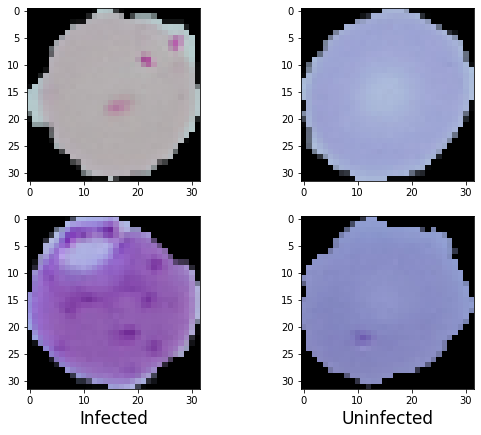

In [9]:
f,axes = plt.subplots(2,2)
f.set_figheight(7)
f.set_figwidth(9)

axes[0,0].imshow(cv2.resize(infected_data[random.randint(0,len(infected_data))],(32,32)),cmap = plt.cm.gray)
#axes[0,0].set_xlabel('Infected',fontsize=17)

axes[0,1].imshow(cv2.resize(uninfected_data[random.randint(1,len(uninfected_data))],(32,32)),cmap = plt.cm.gray)
#axes[0,1].set_xlabel('Uninfected',fontsize=17)

axes[1,0].imshow(cv2.resize(infected_data[random.randint(1,len(infected_data))],(32,32)),cmap = plt.cm.gray)
axes[1,0].set_xlabel('Infected',fontsize=17)

axes[1,1].imshow(cv2.resize(uninfected_data[random.randint(1,len(uninfected_data))],(32,32)),cmap = plt.cm.gray)
axes[1,1].set_xlabel('Uninfected',fontsize=17)


#Data Preprocessing

---



---


 **Data Agumentation**  



we just use rotation and translation in Data Agumentation

we use Data at every 28th iteration and hence results in 4000 samples, but more Data can be generated upto 30000 images

In [10]:
# Data Agumentation

# required Variables
agumented_infected = []
agumented_infected_labels = []
agumented_uninfected = []
agumented_uninfected_labels = []

# Agumentation for Infected Data
for ite,i in enumerate(infected_data):
    if(ite%28 == 0):
        first = agument_shifted(i)
        second,third,fourth = agument_rotated(i)
        agumented_infected.extend([first,second,third,fourth])
        agumented_infected_labels.extend(['infected','infected','infected','infected'])

# Agumentation for Un-Infected Data
for ite,i in enumerate(uninfected_data):
    if(ite%28 == 0):        
        first = agument_shifted(i)
        second,third,fourth = agument_rotated(i)
        agumented_uninfected.extend([first,second,third,fourth])
        agumented_uninfected_labels.extend(['uninfected','uninfected','uninfected','uninfected'])

agumented_infected = np.array(agumented_infected)
agumented_infected_labels = np.array(agumented_infected_labels)
agumented_uninfected = np.array(agumented_uninfected)
agumented_uninfected_labels = np.array(agumented_uninfected_labels)

print('\t \t \t \t Data Generated Sucessfully.....')
print('Total Data Generated : ',len(agumented_infected_labels)+len(agumented_uninfected_labels))
print('\t     Infected : ',len(agumented_infected_labels))
print('\t  Un-Infected : ',len(agumented_uninfected_labels))


	 	 	 	 Data Generated Sucessfully.....
Total Data Generated :  3980
	     Infected :  2008
	  Un-Infected :  1972


**Visulization over Agumented Data**

Text(0.5, 1.0, 'Data Generated By Agumentation')

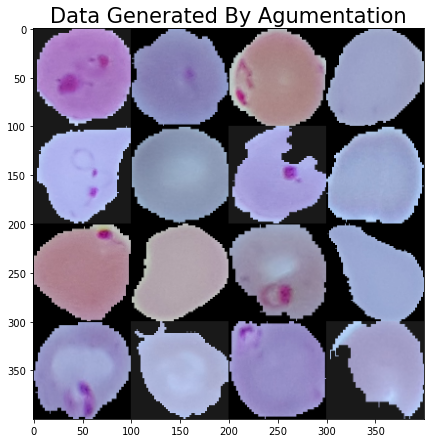

In [23]:
plt.figure(figsize=(7,9))
l1 = []
for i in range(4):
    l=[]
    for j in range(4):
        if(j%2 == 0):    
            l.append(agumented_infected[np.random.randint(0,len(agumented_infected))])
        else:
            l.append(agumented_uninfected[np.random.randint(0,len(agumented_uninfected))])
    
    l1.append(cv2.hconcat(l))

plt.imshow(cv2.vconcat(l1))
plt.title('Data Generated By Agumentation',fontsize=21)

We use Image normalization and standardization for preprocessing. 80% of Total Data used for Training and remaining 20% for Validation

In [11]:
# conacating all different segments of Data
data = np.concatenate((infected_data , uninfected_data , agumented_infected , agumented_uninfected), axis=0)
labels = np.concatenate((infected_labels, uninfected_labels , agumented_infected_labels , agumented_uninfected_labels), axis=0)

# normalization
X = np.divide(data,255)
# standardization
X = np.divide(data - np.mean(data),np.std(data))

# converting Categorical variables
Y = one_hot_encoding(labels)

x_train,x_test , y_train,y_test = train_test_split(X,Y,test_size = 0.2)

print('Training Data : ',len(y_train))
print('Testing Data : ',len(y_test))
print('Infected Data Label : ',Y[0])
print('Un-Infected Data Label : ',Y[17000])

Training Data :  25460
Testing Data :  6365
Infected Data Label :  [1. 0.]
Un-Infected Data Label :  [0. 1.]


# Visulization over Preprocessed Data 

The Region of Intrest More clearly visible after preprocessing 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Preprocessed Data')

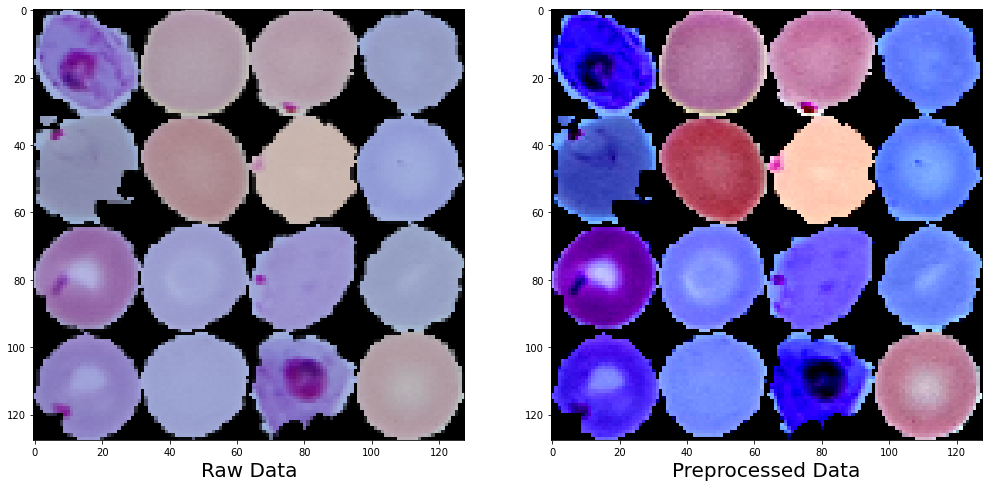

In [8]:
f ,ax = plt.subplots(1,2)
f.set_figheight(17)
f.set_figwidth(17)

l11 = []
l22 = []

for i in range(4):
    l1 = []
    l2 = []
    for j in range(4):
        if(j%2 == 0):
            val = np.random.randint(0,len(infected_data))
        else:
            val = np.random.randint(14050,14050+len(uninfected_data))

        l1.append(cv2.resize(data[val],(32,32)))
        l2.append(cv2.resize(X[val],(32,32)))
          
    l22.append(cv2.hconcat(l2))
    l11.append(cv2.hconcat(l1))


ax[0].imshow(cv2.vconcat(l11),cmap = plt.cm.gray)
ax[0].set_xlabel('Raw Data',fontsize=20)

ax[1].imshow(cv2.vconcat(l22),cmap = plt.cm.gray)
ax[1].set_xlabel('Preprocessed Data',fontsize=20)

#Model Creation

*   we use keras functional API for Model Builing Implementation 
*   Convolution Neural Network(CNN) Algorithum used for better feature  selection and classification
*   Batch Size = 64
*   Epochs = 150
*   Loss = Binary cross-entropy
*   Optimizer = Adam
*   Learning Rate = 1e-06

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation
from keras import optimizers
from keras.layers import Dropout,Flatten,Dense,Input
from sklearn.metrics import accuracy_score

batch_size = 64
epochs = 350
input_shape = x_train[0].shape
num_classes = len(y_train[0])
print(num_classes)

model = Sequential()

#model.add(Input(shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same',input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 128)    

In [0]:
model.compile(optimizer = optimizers.Adam(lr = 1e-06), loss  = 'binary_crossentropy',metrics = ['accuracy'])

In [30]:
history = model.fit(x_train,y_train,batch_size = batch_size, epochs = epochs, validation_data = (x_test,y_test))

Train on 25460 samples, validate on 6365 samples
Epoch 1/350
25460/25460 [==============================] - 27s 1ms/step - loss: 0.6915 - accuracy: 0.5253 - val_loss: 0.6872 - val_accuracy: 0.5846
Epoch 2/350
25460/25460 [==============================] - 20s 780us/step - loss: 0.6826 - accuracy: 0.5771 - val_loss: 0.6730 - val_accuracy: 0.6459
Epoch 3/350
25460/25460 [==============================] - 20s 780us/step - loss: 0.6636 - accuracy: 0.6295 - val_loss: 0.6465 - val_accuracy: 0.6484
Epoch 4/350
25460/25460 [==============================] - 20s 782us/step - loss: 0.6404 - accuracy: 0.6514 - val_loss: 0.6254 - val_accuracy: 0.6581
Epoch 5/350
25460/25460 [==============================] - 20s 781us/step - loss: 0.6261 - accuracy: 0.6625 - val_loss: 0.6146 - val_accuracy: 0.6665
Epoch 6/350
25460/25460 [==============================] - 20s 780us/step - loss: 0.6171 - accuracy: 0.6727 - val_loss: 0.6061 - val_accuracy: 0.6786
Epoch 7/350
25460/25460 [============================

# Saving model Weights 

saving model weights will help in deployment, future use, Transfer Learning etc

In [0]:
# pickle module used for dumping the model
import pickle as pk
with open('/content/drive/My Drive/malaria/malaria_model.pkl','wb') as model_file:
    pk.dump(model,model_file)

# Model Evaluation Analysis

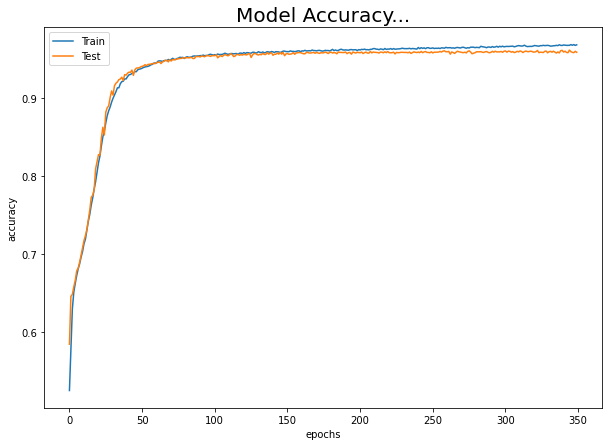

In [34]:
# model Accuracy Analysis
plt.figure(figsize=(10,7))
train_acc = history.history['accuracy'] 
test_acc = history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('Model Accuracy...',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'],loc='upper left')

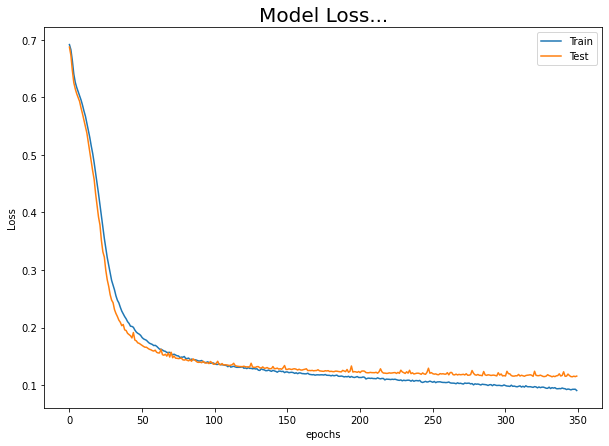

In [35]:
# model Loss Analysis
plt.figure(figsize=(10,7))
train_loss = history.history['loss'] 
test_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('Model Loss...',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper right')

Text(0.5, 1.0, 'Confusion Matrix')

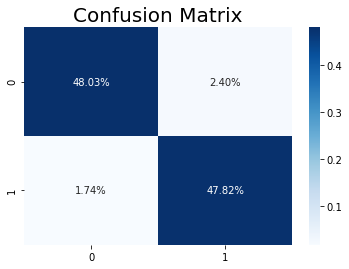

In [36]:
# confusion Matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(np.round(y_pred[:,0]),y_test[:,0])
sns.heatmap(cm/len(y_test), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix',fontsize=20)

.

#Transfer Learning

Transfer Learning is an effective Model Tranining Technique used to train the model on weights of a sucessfully trained model.

Here we uses a very renouned model of VGG 16 which is the winner of ImageNet comptition 2014. This Model Already Present in keras Documentation.

   **Benifits**

*   Very Less time requirement
*   Great Accuracy
*   Almost no or very less computational resources required
*   Fast & effective





In [56]:
from keras.applications.vgg16 import VGG16

image_shape = x_train[0].shape
VGG16_custom_model = VGG16(input_shape = image_shape, weights ='imagenet',include_top =False)

for layer in VGG16_custom_model.layers:
    layer.trainable = False

print(VGG16_custom_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

**Creating the Custom VGG-16 model for our Data-Set**

Parameters : 

*   Batch Size = 64
*   epochs = 10
*   Dropout = None
*   weight = Pretrained imagenet weights  



In [57]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras import optimizers

batch_size = 64
epochs = 10

# number of classes
num_classes = len(y_train[0])

# adding outputs
flatten = Flatten()(VGG16_custom_model.output)

# Fully Connected Layers
dense1 = Dense(1024,activation='relu')(flatten)

dense2 = Dense(num_classes ,activation = 'softmax')(dense1)

# Final custom Model
model = Model(inputs = VGG16_custom_model.input,outputs = dense2)
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

Model Compilation and Execution.....

In [58]:
model.compile(optimizer = optimizers.Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

vgg_history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs, validation_data = (x_test,y_test))
# _ var is like ans variable in python

Train on 25460 samples, validate on 6365 samples
Epoch 1/10
25460/25460 [==============================] - 23s 890us/step - loss: 0.2048 - accuracy: 0.9281 - val_loss: 0.1683 - val_accuracy: 0.9361
Epoch 2/10
25460/25460 [==============================] - 22s 880us/step - loss: 0.1393 - accuracy: 0.9501 - val_loss: 0.1328 - val_accuracy: 0.9544
Epoch 3/10
25460/25460 [==============================] - 23s 892us/step - loss: 0.1283 - accuracy: 0.9517 - val_loss: 0.1294 - val_accuracy: 0.9551
Epoch 4/10
25460/25460 [==============================] - 23s 891us/step - loss: 0.1150 - accuracy: 0.9570 - val_loss: 0.1408 - val_accuracy: 0.9493
Epoch 5/10
25460/25460 [==============================] - 23s 890us/step - loss: 0.1093 - accuracy: 0.9608 - val_loss: 0.1358 - val_accuracy: 0.9522
Epoch 6/10
25460/25460 [==============================] - 23s 891us/step - loss: 0.0971 - accuracy: 0.9624 - val_loss: 0.1312 - val_accuracy: 0.9532
Epoch 7/10
25460/25460 [==============================] -

# Saving the VGG16 Custom Model File  

saved model will later used for Deployment, Transfer Learning

In [0]:
# pickle module used for dumping the model
import pickle as pk
with open('/content/drive/My Drive/malaria/malaria_VGGmodel.pkl','wb') as model_file:
    pk.dump(model,model_file)

#Ensamble Techniques

As in Both the cases we get the accuracy around 95% and we understand the citicality of Data so, we must have to try rrduce the mis-classification as much as possible

We uses a Bagging Approch for our Ensamble Methord with goes with average or Majority Prediction of all Models.

This approch helps to reduce the Miscalssifications upto 1.5% 

In [60]:
import pickle as pk
all_models = []

with open('/content/drive/My Drive/malaria/malaria_VGGmodel.pkl','rb') as model_file:
    model = pk.load(model_file)
    all_models.append(model)

with open('/content/drive/My Drive/malaria/malaria_model.pkl','rb') as model_file:
    model = pk.load(model_file)
    all_models.append(model)

print('Total models : ',len(all_models))

Total models :  2


**Prediction from Ensamble Model**

In [61]:
predictions = []

for model in all_models:
    predictions.append(model.predict(x_test))

output = np.round(np.divide(sum(predictions),2))
actual = y_test
print(output)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


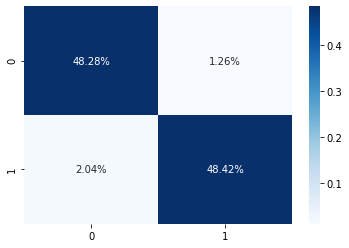

In [62]:
cm = confusion_matrix(actual[:,0],output[:,0])
sns.heatmap(cm/len(actual),fmt='.2%',annot=True,cmap='Blues')

# Complete Project Evaluation....

This Section responsible for evaluation of all three models


Text(0.5, 1.0, 'Ensamble Model')

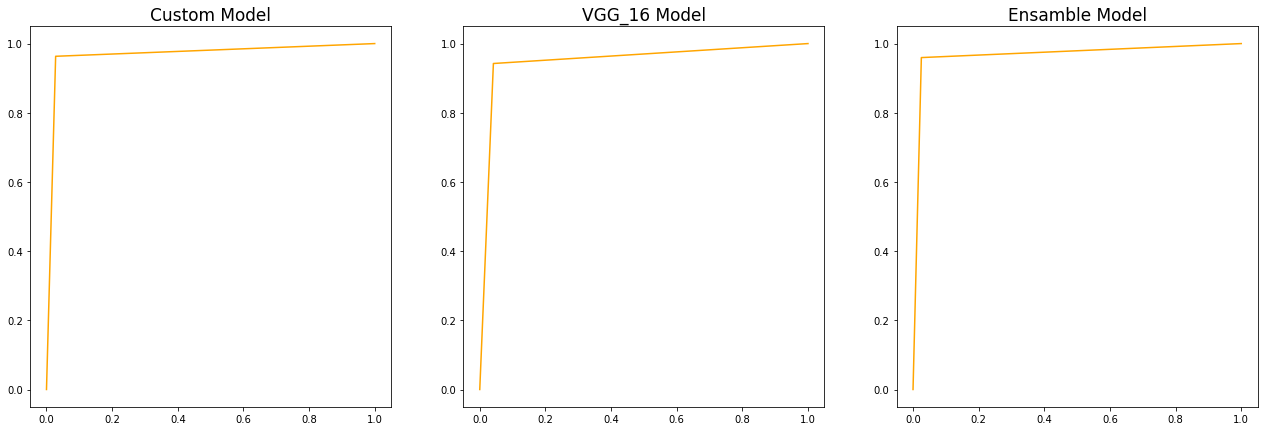

In [94]:
f,ax = plt.subplots(1,3)
f.set_figheight(7)
f.set_figwidth(22)

# all model output in single axis
output_custom = np.round(all_models[1].predict(x_test))[:,0] 
output_vgg = np.round(all_models[0].predict(x_test))[:,0]
output_ensamble = output[:,0]

# roc curves
a1,b1,c1=roc_curve(y_test[:,0],output_custom)
a2,b2,c2=roc_curve(y_test[:,0],output_vgg)
a3,b3,c3=roc_curve(y_test[:,0],output_ensamble)

# visulizing ROC 
ax[0].plot(a1,b1,color='orange')
ax[0].set_title('Custom Model',fontsize=17)

ax[1].plot(a2,b2,color='orange')
ax[1].set_title('VGG_16 Model',fontsize=17)

ax[2].plot(a3,b3,color='orange')
ax[2].set_title('Ensamble Model',fontsize=17)

**Calculating all aspects of Evaluation** 

In [0]:
y_test_custom = np.divide(((y_test[:,0]-output_custom)==0).sum(),len(actual))*100
y_test_vgg16 = np.divide(((y_test[:,0]-output_vgg)==0).sum(),len(actual))*100
y_test_combined = np.divide(((y_test[:,0]-output_ensamble)==0).sum(),len(actual))*100

missclass_custom = confusion_matrix(y_test[:,0],np.round(all_models[1].predict(x_test)[:,0]))/len(y_test)
missclass_custom = (missclass_custom[0,1]+missclass_custom[1,0])*100

missclass_vgg = confusion_matrix(y_test[:,0],np.round(all_models[0].predict(x_test)[:,0]))/len(y_test)
missclass_vgg = (missclass_vgg[0,1] + missclass_vgg[1,0])* 100

missclass_combined = confusion_matrix(y_test[:,0],output[:,0])/len(y_test)
missclass_combined =  (missclass_combined[0,1] + missclass_combined[1,0])*100

roc_custom = roc_auc_score(y_test[:,0],output_custom)
roc_vgg = roc_auc_score(y_test[:,0],output_vgg)
roc_ensamble = roc_auc_score(y_test[:,0],output_ensamble)


**Result Evaluation**

In [99]:
df = pd.DataFrame(
                  np.array([[y_test_custom, missclass_custom, roc_custom],
                            [y_test_vgg16,missclass_vgg, roc_vgg],
                            [y_test_combined,missclass_combined, roc_ensamble]]),
                  index = ['Custom Model','VGG_16 Model','Ensamble Model'],
                  columns=['Accuracy (%)','Misclassified (%)','AUC score']
                  )
df

,Accuracy (%),Misclassified (%),AUC score
Custom Model,96.763551,3.236449,0.967676
VGG_16 Model,95.035350,4.964650,0.950428
Ensamble Model,96.700707,3.299293,0.967077
